# This challenge 8 where we are looking at the least squares method

## This is used when we have an overly determined system so we can find the "best solution" curve

True slope: 1.4363502971184063, True intercept: 1.8521429192297485
Slope: 1.4738006010296838, Intercept: 1.7576754997610495

Largest positive residual:
  X = 0.67  Y = 3.788271491500115  Residual = 1.0431495890491775
Largest negative residual:
  X = 0.7000000000000001  Y = 1.868632361459838  Residual = -0.9207035590219901


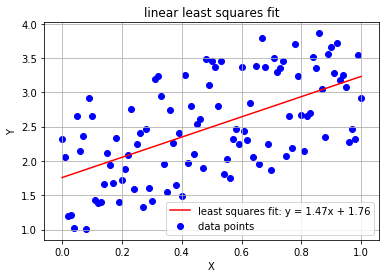

In [3]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt

# generate data
np.random.seed(42)
m_true = np.random.uniform(0.5, 3.0)
b_true = np.random.uniform(-1.0, 2.0)

# the slides said to use your own m and b but I didn't know if this meant to 
# hard code it so I just used some random points so the slopes and y intercept 
#will differ each time you run it. 

# x from 0 to 1 in steps of 0.01
X = np.arange(0, 1.01, 0.01)
noise = np.random.uniform(-1, 1, len(X))

# 
Y = m_true * X + b_true + noise

# least squares fit
A = np.vstack([X, np.ones(len(X))]).T
m, c = np.linalg.lstsq(A, Y, rcond=None)[0]

# predicted values and residuals
Y_pred = m * X + c
residuals = Y - Y_pred

# 
max_res_idx = np.argmax(residuals)
min_res_idx = np.argmin(residuals)

print(f"True slope: {m_true}, True intercept: {b_true}")
print(f"Slope: {m}, Intercept: {c}")
print()
print(f"Largest positive residual:")
print(f"  X = {X[max_res_idx]}  Y = {Y[max_res_idx]}  Residual = {residuals[max_res_idx]}")
print(f"Largest negative residual:")
print(f"  X = {X[min_res_idx]}  Y = {Y[min_res_idx]}  Residual = {residuals[min_res_idx]}")

# plot
X_line = np.linspace(X.min(), X.max(), 20)
Y_line = m * X_line + c

plt.figure()
plt.scatter(X, Y, color='blue', label='data points')
plt.plot(X_line, Y_line, color='red', label=f'least squares fit: y = {m:.2f}x + {c:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('linear least squares fit')
plt.legend()
plt.grid(True)
plt.show()